In [1]:
!pip install simpy

In [2]:
hombres=['Hugo ',' Martín ',' Lucas ',' Mateo ',' Leo ',' Daniel ',' Alejandro ',' Pablo ',' Manuel',' Álvaro ',' Adrián ',' David ',' Mario ',' Enzo ',' Diego ',' Marcos ',' Izan',' Javier ',' Marco ',' Álex ',' Bruno ',' Oliver ',' Miguel ',' Thiago ',' Antonio ',' Marc ',' Carlos ',' Ángel ',' Juan ',' Gonzalo ',' Gael ',' Sergio ',' Nicolás ',' Dylan ',' Gabriel ',' Jorge ',' José ',' Adam ',' Liam ',' Eric ',' Samuel ',' Darío ',' Héctor ',' Luca ',' Iker ',' Amir ',' Rodrigo ',' Saúl ',' Víctor ',' Francisco ',' Iván ',' Jesús ',' Jaime ',' Aarón ',' Rubén ',' Ian ',' Guillermo ',' Erik ',' Mohamed ',' Julen ',' Luis ',' Pau ',' Unai ',' Rafael ',' Joel ',' Alberto ',' Pedro ',' Raúl ',' Aitor ',' Santiago ',' Rayan ',' Pol ',' Nil ',' Noah ',' Jan ',' Asier ',' Fernando ',' Alonso ',' Matías ',' Biel ',' Andrés ',' Axel ',' Ismael ',' Martí ',' Arnau ',' Imran ',' Luka ',' Ignacio ',' Aleix ',' Alan ',' Elías ',' Omar ',' Isaac ',' Youssef ',' Jon ',' Teo ',' Mauro ',' Óscar ',' Cristian ',' Leonardo ']
mujeres=['Sofía',' Camila',' Valentina',' Isabella',' Valeria',' Daniela',' Mariana',' Sara',' Victoria',' Gabriela',' Ximena',' Andrea',' Natalia',' Mía',' Martina',' Lucía',' Samantha',' María',' María Fernanda',' Nicole',' Alejandra',' Paula',' Emily',' María José',' Fernanda',' Luciana',' Ana Sofía',' Melanie',' Regina',' Catalina',' Ashley',' Renata',' Agustina',' Abril',' Emma',' Emilia',' Jazmín',' Juanita',' Briana',' Vanessa',' Antonia',' Laura',' Antonella',' Luna',' Carla',' Allison',' Monserrat',' Paulin',' Isabel',' Juliana',' Valerie',' Florencia',' Adriana',' Naomí',' Amanda',' Ariana',' Morena',' Natalie',' Constanza',' Lola',' Zoe',' Carolina',' Micaela',' Julia',' Claudia',' Paola',' Alexa',' Elena',' Isidora',' Rebeca',' Josefina',' Abigail',' Julieta',' Melissa',' Michelle',' Alba',' María Camila',' Angela',' Delfina',' Aitana',' Stephanie',' Fátima',' Manuela',' Alexandra',' Paloma',' Candela',' Clara',' Laura Sofía',' Diana',' Ana María',' Guadalupe',' Bárbara',' Bianca',' Miranda',' Sabrina',' Pilar',' Ana María',' Marta',' Ana',' Génesis']
"""
hombres=['Hugo ',' Martín ',' Lucas ']
mujeres=['Sofía',' Camila',' Valentina']
"""

"\nhombres=['Hugo ',' Martín ',' Lucas ']\nmujeres=['Sofía',' Camila',' Valentina']\n"

#i

In [3]:
class SavePersons:
    infos = []
    persona = object
    def __init__(self, name):
        self.name = name
    def add_person_dest(self, persona,destino):
        self.infos.append(persona.name+ ' viaja a '+ destino)
personas_destinos=SavePersons("not logic")     


class Persona:    
    name = ''
    edad = ''
    genero = ''    
    def __init__(self, nombre,edad,genero):
        self.name = nombre
        self.edad = edad
        self.genero = genero
"""
p=Persona('pedro','23','M')
print(p.name)
personas_destinos.add_person_dest(p,'valle')
print(personas_destinos.infos)
"""        

"\np=Persona('pedro','23','M')\nprint(p.name)\npersonas_destinos.add_person_dest(p,'valle')\nprint(personas_destinos.infos)\n"

In [5]:
import matplotlib.pyplot as plt
import numpy as np 
from scipy import stats 
import seaborn as sns 

def generarPersona():
  bernoulli = stats.bernoulli(0.5)
  val =  bernoulli.rvs(1)
  genero = "M" if val else "F"
  nombre= random.choice(hombres) if val else random.choice(mujeres)
  mu = 28 # parametro de forma 
  poisson = stats.poisson(mu) # Distribución
  edad = poisson.rvs(1)  # genera aleatorios

  return Persona(nombre,edad,genero)
"""
pp=generarPersona()
print(pp.name)
print(pp.edad)
print(pp.genero)
"""

'\npp=generarPersona()\nprint(pp.name)\nprint(pp.edad)\nprint(pp.genero)\n'

In [6]:
import collections
import random
import simpy


NUM_PASJEROS = 40
NUM_BUSES=10
TIEMPO_SIMULACION = 120


MEDIA=0.16
DESV_S=0.03



def run_transporte(env,empresaturismo,destino):  
  with empresaturismo.resurso_buses.request() as peticion: # Genero un evento de requerimiento
    yield peticion # Obtengo el recurso
    #imprimir_datos_recurso_bus(resurso_buses) # Imprimo los datos del recuros obtenido
    #print('Comienza viaje destino: %s tiempo en llegar %.1f horas' %(destino, empresaturismo.hours_desti[destino]))
    yield env.timeout(empresaturismo.hours_desti[destino]) # Hago uso del bus en horas  ida y regreso
    empresaturismo.resurso_buses.release(peticion) #Libero el bus luego de la ruta
    #print('Termino el viaje hacia: %s tiempo empleado %.1f horas' %(destino, empresaturismo.hours_desti[destino]))
    #print('Se libera el bus')

def imprimir_datos_recurso_bus(rec):
  print(f'{rec.count} de {rec.capacity}') 
  print(f' Usuarios que hacen uso: {rec.users}')
  print(f' Evento de colas: {rec.queue}')    

#esta es la venta como tal DE LOS PASAJES
def ventaPasajes(env, num_pasajes, destino, empresaturismo):
  with empresaturismo.recurso_cout_pasajes.request() as turno:
    resultado = yield turno | empresaturismo.sold_out[destino]#creo que verifica si todavia hay pasajes 
    #if turno not in resultado:
    #  empresaturismo.num_renegados[destino] += 1#
    #  return
    if empresaturismo.num_pasajes[destino] < num_pasajes:# si haun hay boletos se procede la compra 
      #yield env.timeout(0.5) #TIEMPO QUE TARDA EN LA COMPRA
      return
    empresaturismo.num_pasajes[destino] -= num_pasajes# decrementacion de los boletos
    if empresaturismo.num_pasajes[destino] == 0:
      #empresaturismo.sold_out[destino].succeed()
      #empresaturismo.tiempo_agotado[destino] = env.now
      empresaturismo.num_buses[destino]+=1  
      env.process(run_transporte(env,empresaturismo,destino))    
      empresaturismo.num_pasajes[destino] = 40
    diccDestinosT[destino] +=1

  
    

def llegadaPasajeros(env, empresaturismo):
  while True:    
    normal = stats.norm(MEDIA, DESV_S)
    yield env.timeout(normal.rvs(1))#Estimado de llegada de pasajeros
    destino = random.choice(empresaturismo.destinos)# cre que en este punto se decide que destino tomar
    #print(pelicula)
    num_pasajes = 1#el numero de boletos que va a comprar 
    #num_pasajes =random.randint(1, 6)
    persona=generarPersona()#Operacion que genera la Persona
    personas_destinos.add_person_dest(persona,destino)
    #print(num_pasajes)
    if empresaturismo.num_pasajes[destino]:# si todavia hay boletos
      env.process(ventaPasajes(env, num_pasajes, destino, empresaturismo)) 
    
    
      
Empresaturismo = collections.namedtuple('Empresaturismo', 'recurso_cout_pasajes,resurso_buses, hours_desti, destinos, num_pasajes, sold_out, num_buses')#, tiempo_agotado, num_renegados
env = simpy.Environment()

recurso_cout_pasajes = simpy.Resource(env,capacity=1)
resurso_buses = simpy.Resource(env,capacity=NUM_BUSES)
destinos = ['Guayaquil', 'Santa elena', 'Salinas','baños','montañita']
horas_viaje = [2,5,7,9,6]
hours_desti=dict(zip(destinos,horas_viaje))
num_pasajes = {destino: NUM_PASJEROS for destino in destinos}#asignar pasajes a cada destino
sold_out = {destino: env.event() for destino in destinos}# evento por cada destino
#tiempo_agotado = {pelicula: None for pelicula in peliculas}#LISTAS VACIAS
num_buses = {destino: 0 for destino in destinos}#VALORES INICIADOS EN CERO
diccDestinosT = {destino: 0 for destino in destinos}#VALORES INICIADOS EN CERO

empresaturismo = Empresaturismo(recurso_cout_pasajes, resurso_buses, hours_desti, destinos, num_pasajes, sold_out,num_buses)
env.process(llegadaPasajeros(env, empresaturismo))
env.run(until=TIEMPO_SIMULACION)#fuck time simulation, es decir los pasos que se van a tomar

print('Empresa de turismo PATITO')
for destino in destinos:
  if empresaturismo.sold_out[destino]:       
    print('Destino: %s necesita %.1f buses' %(destino, empresaturismo.num_buses[destino]))
# Analisis y resultados        

Empresa de turismo PATITO
Destino: Guayaquil necesita 3.0 buses
Destino: Santa elena necesita 3.0 buses
Destino: Salinas necesita 3.0 buses
Destino: baños necesita 3.0 buses
Destino: montañita necesita 3.0 buses


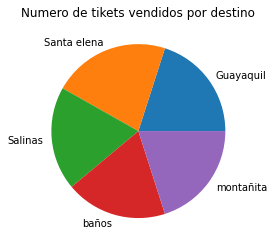

In [ ]:
plt.pie(list(diccDestinosT.values()), labels=list(diccDestinosT.keys()))
plt.title('Numero de tikets vendidos por destino')
plt.show()

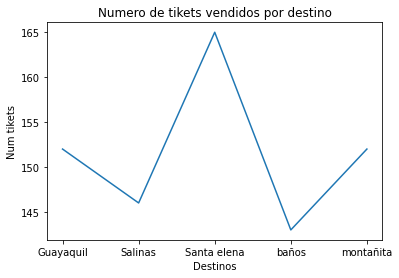

In [ ]:
myList = diccDestinosT.items()
myList = sorted(myList) 
x, y = zip(*myList) 
plt.plot(x, y)
plt.title('Numero de tikets vendidos por destino')
plt.xlabel('Destinos')
plt.ylabel('Num tikets')
plt.show()

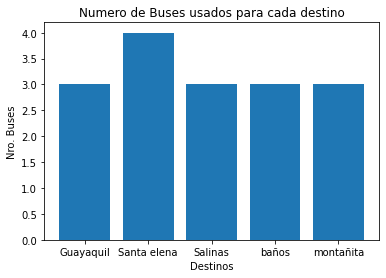

In [ ]:
etiqueta = list(num_buses.keys())
valores = list(num_buses.values())
plt.bar(range(len(num_buses)), valores, align="center", tick_label=etiqueta)
plt.title("Numero de Buses usados para cada destino")
plt.xlabel("Destinos")
plt.ylabel("Nro. Buses")
plt.show()